# Week 7: k Nearest Neighbor and Naive Bayes
This week, we are going to take the whole idea of forecasting a step further. With last week's logistic regression, we learned how to build a model that sorts data into 1 of two factors in a target attribute; in other words: A model with binary class outcome. This week, we are going to work with a categorical class attribute and two different machine learning mechanism: The empirical classifier k Nearest Neighbor and the statistical classifier Naive Bayes.

Much of this week's code comes from Ron Zacharski's Machine Learning Github: https://github.com/zacharski/machine-learning/tree/master/notebooks

## 1: k Nearest Neighbor
The concept of the k-nearest neighbor classifier is part of our everyday life and judging: Imagine you meet a group of people, they are all very young, stylish and sportive. They talk about there friend Ben, who isn't with them. So, what is your imagination of Ben? Right, you imagine him as being yong, stylish and sportive as well.

If you learn that Ben lives in a neighborhood where people vote conservative and that the average income is above 200000 dollars a year? Both his neighbors make even more than 300,000 dollars per year? What do you think of Ben? Most probably, you do not consider him to be an underdog and you may suspect him to be a conservative as well?

The principle behind nearest neighbor classification consists in finding a predefined number, i.e. the 'k' - of training samples closest in distance to a new sample, which has to be classified. The label of the new sample will be defined from these neighbors. k-nearest neighbor classifiers have a fixed user defined constant for the number of neighbors which have to be determined. There are also radius-based neighbor learning algorithms, which have a varying number of neighbors based on the local density of points, all the samples inside of a fixed radius. The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply "remember" all of its training data. Classification can be computed by a majority vote of the nearest neighbors of the unknown sample.

### Nearest Neighbor Algorithm:
Given a set of categories {c1,c2,...cn}, also called classes, e.g. {"male", "female"}. There is also a training set LS consisting of labelled instances.
The task of classification consists in assigning a category or class to an arbitrary instance. If the instance o is an element of LS, the label of the instance will be used.
Now, we will look at the case where o is not in LS: o is compared with all instances of LS. A distance metric is used for comparison. We determine the k closest neighbors of o, i.e. the items with the smallest distances. k is a user defined constant and a positive integer, which is usually small. The most common class of LS will be assigned to the instance o. If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

The algorithm for the k-nearest neighbor classifier is among the simplest of all machine learning algorithms. k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all the computations are performed, when we do the actual classification.

### The famous iris dataset--to have a dataset to compare with the Naive Bayes example below
The iris flower dataset is so famous, it even has a Wikipedia page! https://en.wikipedia.org/wiki/Iris_flower_data_set. The actual data set sits right here: http://archive.ics.uci.edu/ml/datasets/Iris, but it has also become a part of many R and Python packages, as you will see below. A good 

The data set consists of samples from each of three species of Iris as:
* Iris setosa
* Iris virginica
* Iris versicolor
These flowers are separated/seggregated by various attributes like:
* sepal length
* sepal width
* petal length
* petal width
These attributes are the actual features used for classification.

The dataset has 150 tuples.

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

### The "Easy Way" using sklearn

In [24]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [25]:
print("keys of iris datasets: \n {}".format(iris.keys()))

keys of iris datasets: 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [26]:
# We have three levels in the target class (called "species" in other editions of this dataset:
print("Target names: {}".format(iris["target_names"]))

Target names: ['setosa' 'versicolor' 'virginica']


In [27]:
# We have four features of Iris
print("Feature names: {}".format(iris["feature_names"]))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [28]:
# So, the complete data set looks like this:
# 50 samples for each Iris species
print("Shape of our dataset: {}".format(iris["data"].shape))

Shape of our dataset: (150, 4)


In [29]:
# What data type do we have? Whoa, it's not a data frame, but an array!
print("Type of data: {}".format(type(iris["data"])))

Type of data: <class 'numpy.ndarray'>


In [30]:
# Now, let's set up the rest of our math
X = iris.data
Y = iris.target
#print(X)
#print(Y)
flowers = iris.target_names
print(flowers)
features = iris.feature_names
print(features)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Since there are 4 features for a single data point, we cannot plot those directly. For now let's visualize 2 features at a time.

Text(0.5,1,'Iris data 2D')

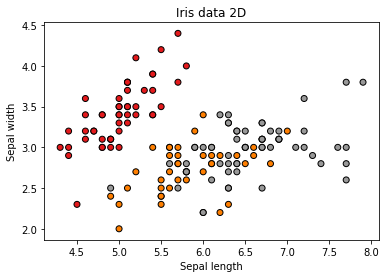

In [31]:
# First, a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris data 2D')

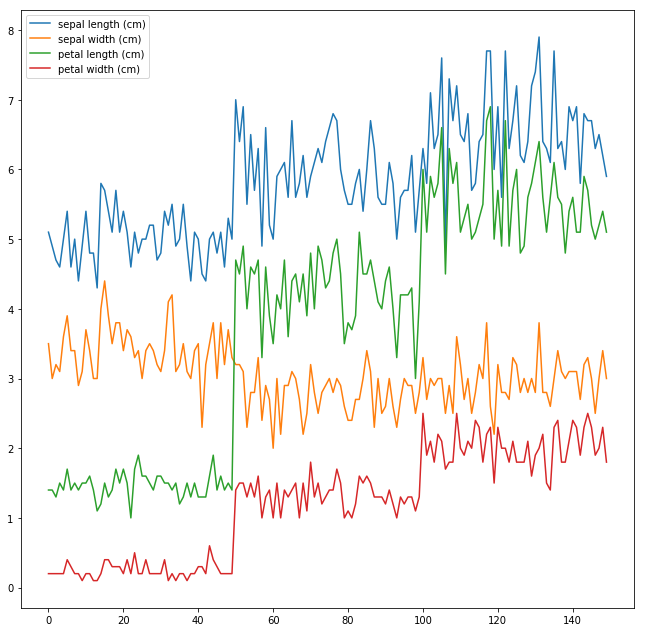

In [32]:
# Now, a line plot of the features
df = pd.DataFrame(X, columns=features)
df.plot(figsize=(11, 11))

Remember that, in k-NN classification, the output is class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [33]:
# Let's try this with k = 1 first and see what happens!

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris["data"], iris["target"], random_state = 0)

# So, what training data do we have?
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [35]:
# And what test data do we have?
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [36]:
# What about just the one nearest neighbor? Note here that the metric is set to minkowski, 
# but the p is set to 2, which means that we are using Euclidian distance (1 = Manhattan distance)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [37]:
# Now, let's test this model
y_pred = knn.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [38]:
# But is is any good?
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Well, looking for just the first nearest neighbor is a nice thing. Let's split the original dataset specifying the test size as 1/3 and look for the 5 nearest neighbors!

In [39]:
# The easy way to split into train and test!

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (100, 4)
y_train shape: (112,)
X_test shape: (50, 4)
y_test shape: (38,)


In [40]:
# use knn on train dataset
model = neighbors.KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

acc = np.sum(Y_pred == Y_test) /  len(Y_test)
acc * 100

96.0

Wait, seriously? Why are we getting a result that is only slightly different with much more processing effort?

The optimal number of neighbors is 13


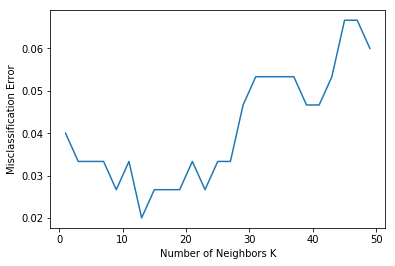

In [41]:
# And what about our beloved cross-validation? How about we run this with multiple options? 
# How should we pick our k, anyway????
# I know: Questions, questions ...

# creating a list of k for kNN
klist = list(range(1,50,2))

# empty list that will hold cross-validation scores
cv_scores = []

# Perform 10-fold cross validation for each k value because we have a small dataset, so we can do this.
for k in klist:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Changing to misclassification error
errors = 1- np.array(cv_scores)

# NOW we can use the error ratio to even determine an optimal k!
optimal_k = klist[np.argmin(errors)]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(klist, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### The Painful Way
Why make things easy when you can do them the hard (and painful) way? If you want to see what kNN looks like without sklearn, enjoy the painful coding below. Otherwise, skip to Naive Bayes now.

In [42]:
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data[0], iris_data[79], iris_data[100])
print(iris_labels[0], iris_labels[79], iris_labels[100])

[5.1 3.5 1.4 0.2] [5.7 2.6 3.5 1. ] [6.3 3.3 6.  2.5]
0 1 2


In [43]:
# We create a training set from the sets above. We use permutation from np.random to split the data randomly.
np.random.seed(42)
indices = np.random.permutation(len(iris_data))
n_training_samples = 12
training_data = iris_data[indices[:-n_training_samples]]
training_labels = iris_labels[indices[:-n_training_samples]]
test_data = iris_data[indices[-n_training_samples:]]
test_labels = iris_labels[indices[-n_training_samples:]]
print(training_data[:4], training_labels[:4])
print(test_data[:4], test_labels[:4])

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]] [1 0 2 1]
[[5.7 2.8 4.1 1.3]
 [6.5 3.  5.5 1.8]
 [6.3 2.3 4.4 1.3]
 [6.4 2.9 4.3 1.3]] [1 2 1 1]


The following code is only necessary to visualize the data of our training set. Our data consists of four values per iris item, so we will reduce the data to three values by summing up the third and fourth value. This way, we can depict the data in 3-dimensional space:

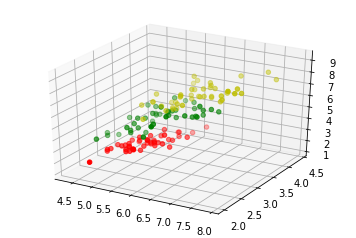

In [45]:
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
colors = ("r", "b")
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(training_data)):
        if training_labels[i] == iclass:
            X[iclass][0].append(training_data[i][0])
            X[iclass][1].append(training_data[i][1])
            X[iclass][2].append(sum(training_data[i][2:]))
colors = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colors[iclass])
plt.show()

To determine the similarity between two instances, we need the Euclidean distance function. We already know that sklearn does this by itself, but here is what this looks like when written out, and it really shows how this algorithm is supposed to work:

In [46]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)
print(distance([3, 5], [1, 1]))
print(distance(training_data[3], training_data[44]))

4.47213595499958
3.4190641994557516


The function 'get_neighbors returns a list with 'k' neighbors, which are closest to the instance 'test_instance':

In [47]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

get_neighors calculates a list of the k nearest neighbors of an instance 'test_instance'.
The list neighbors contains 3-tuples with (index, dist, label) where index is the index from the training_set, dist is the distance between the test_instance and the instance training_set[index] distance is a reference to a function used to calculate the distances

We will test the function with our iris samples:

In [48]:
for i in range(5):
    neighbors = get_neighbors(training_data, 
                              training_labels, 
                              test_data[i], 
                              3, 
                              distance=distance)
    print(i, 
          test_data[i], 
          test_labels[i], 
          neighbors)

0 [5.7 2.8 4.1 1.3] 1 [(array([5.7, 2.9, 4.2, 1.3]), 0.14142135623730995, 1), (array([5.6, 2.7, 4.2, 1.3]), 0.17320508075688815, 1), (array([5.6, 3. , 4.1, 1.3]), 0.22360679774997935, 1)]
1 [6.5 3.  5.5 1.8] 2 [(array([6.4, 3.1, 5.5, 1.8]), 0.1414213562373093, 2), (array([6.3, 2.9, 5.6, 1.8]), 0.24494897427831783, 2), (array([6.5, 3. , 5.2, 2. ]), 0.3605551275463988, 2)]
2 [6.3 2.3 4.4 1.3] 1 [(array([6.2, 2.2, 4.5, 1.5]), 0.2645751311064586, 1), (array([6.3, 2.5, 4.9, 1.5]), 0.574456264653803, 1), (array([6. , 2.2, 4. , 1. ]), 0.5916079783099617, 1)]
3 [6.4 2.9 4.3 1.3] 1 [(array([6.2, 2.9, 4.3, 1.3]), 0.20000000000000018, 1), (array([6.6, 3. , 4.4, 1.4]), 0.2645751311064587, 1), (array([6.6, 2.9, 4.6, 1.3]), 0.3605551275463984, 1)]
4 [5.6 2.8 4.9 2. ] 2 [(array([5.8, 2.7, 5.1, 1.9]), 0.3162277660168375, 2), (array([5.8, 2.7, 5.1, 1.9]), 0.3162277660168375, 2), (array([5.7, 2.5, 5. , 2. ]), 0.33166247903553986, 2)]


We will write a vote function now. This functions uses the class 'Counter' from collections to count the quantity of the classes inside of an instance list. This instance list will be the neighbors of course. The function 'vote' returns the most common class:

In [49]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [50]:
# Let's test 'vote' on our training samples:
for i in range(n_training_samples):
    neighbors = get_neighbors(training_data, 
                              training_labels, 
                              test_data[i], 
                              3, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote(neighbors), 
          ", label: ", test_labels[i], 
          ", data: ", test_data[i])

index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]


We can see that the predictions correspond to the labelled results, except in case of the item with the index 8.
'vote_prob' is a function like 'vote' but returns the class name and the probability for this class:

In [51]:
def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

In [52]:
for i in range(n_training_samples):
    neighbors = get_neighbors(training_data, 
                              training_labels, 
                              test_data[i], 
                              5, 
                              distance=distance)
    print("index: ", i, 
          ", vote_prob: ", vote_prob(neighbors), 
          ", label: ", test_labels[i], 
          ", data: ", test_data[i])

index:  0 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , vote_prob:  (2, 1.0) , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , vote_prob:  (2, 1.0) , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , vote_prob:  (2, 0.8) , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , vote_prob:  (1, 1.0) , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , vote_prob:  (2, 1.0) , label:  2 , data:  [7.1 3.  5.9 2.1]


### Weighted kNN
We looked only at k items in the vicinity of an unknown object „UO", and had a majority vote. Using the majority vote seems quite efficient in our previous example, but didn't take into account the following: The farther a neighbor is, the more it "deviates" from the "real" result. Or in other words, we can trust the closest neighbors more than the farther ones. Let's assume, we have 11 neighbors of an unknown item UO. The closest five neighbors belong to a class A and all the other six, which are farther away belong to a class B. What class should be assigned to UO? The previous approach says B, because we have a 6 to 5 vote in favor of B. On the other hand the closest 5 are all A and this should count more. To pursue this strategy, we can assign weights to the neighbors in the following way: The nearest neighbor of an instance gets a weight 1/1, the second closest gets a weight of 1/2, up to 1/k for the farthest neighbor. This is called a harmonic series:

In [53]:
def vote_harmonic_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        class_counter[neighbors[index][2]] += 1/(index+1)
    labels, votes = zip(*class_counter.most_common())
    # print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [55]:
for i in range(n_training_samples):
    neighbors = get_neighbors(training_data, 
                              training_labels, 
                              test_data[i], 
                              6, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", 
          vote_harmonic_weights(neighbors,
                                all_results=True))

index:  0 , result of vote:  (1, [(1, 1.0)])
index:  1 , result of vote:  (2, [(2, 1.0)])
index:  2 , result of vote:  (1, [(1, 1.0)])
index:  3 , result of vote:  (1, [(1, 1.0)])
index:  4 , result of vote:  (2, [(2, 0.9319727891156463), (1, 0.06802721088435375)])
index:  5 , result of vote:  (2, [(2, 0.8503401360544217), (1, 0.14965986394557826)])
index:  6 , result of vote:  (0, [(0, 1.0)])
index:  7 , result of vote:  (1, [(1, 1.0)])
index:  8 , result of vote:  (1, [(1, 1.0)])
index:  9 , result of vote:  (0, [(0, 1.0)])
index:  10 , result of vote:  (1, [(1, 1.0)])
index:  11 , result of vote:  (2, [(2, 1.0)])


The previous approach took only the ranking of the neighbors according to their distance in account. We can improve the voting by using the actual distance. Let's write a new voting function:

In [56]:
def vote_distance_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        dist = neighbors[index][1]
        label = neighbors[index][2]
        class_counter[label] += 1 / (dist**2 + 1)
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [57]:
for i in range(n_training_samples):
    neighbors = get_neighbors(training_data, 
                              training_labels, 
                              test_data[i], 
                              6, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote_distance_weights(neighbors,
                                                      all_results=True))

index:  0 , result of vote:  (1, [(1, 1.0)])
index:  1 , result of vote:  (2, [(2, 1.0)])
index:  2 , result of vote:  (1, [(1, 1.0)])
index:  3 , result of vote:  (1, [(1, 1.0)])
index:  4 , result of vote:  (2, [(2, 0.8490154592118361), (1, 0.15098454078816387)])
index:  5 , result of vote:  (2, [(2, 0.6736137462184478), (1, 0.3263862537815521)])
index:  6 , result of vote:  (0, [(0, 1.0)])
index:  7 , result of vote:  (1, [(1, 1.0)])
index:  8 , result of vote:  (1, [(1, 1.0)])
index:  9 , result of vote:  (0, [(0, 1.0)])
index:  10 , result of vote:  (1, [(1, 1.0)])
index:  11 , result of vote:  (2, [(2, 1.0)])


Wouldn't it be nice to have an easier way of doing this? This is where the neighbors function of scikit learn comes in. We will use the k-nearest neighbor classifier 'KNeighborsClassifier' from 'sklearn.neighbors' on the Iris data set. You see that it uses the Minkowski distance again. The p parameter is the power parameter for Minkowski and you see the default value is 2. When p=1 Minkowski distance is the Manhattan Distance, when p=2 it is the Euclidean distance.

In [58]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(training_data, training_labels) 
KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=5, 
                     p=2,
                     weights='uniform')

# Displaying the output as a confusion matrix of sorts
print("Predictions from the classifier:")
print(knn.predict(test_data))
print("Target values:")
print(test_labels)

Predictions from the classifier:
[1 2 1 1 2 2 0 1 1 0 1 2]
Target values:
[1 2 1 1 2 2 0 1 2 0 1 2]


In [59]:
training_data[:5], training_labels[:5]

(array([[6.1, 2.8, 4.7, 1.2],
        [5.7, 3.8, 1.7, 0.3],
        [7.7, 2.6, 6.9, 2.3],
        [6. , 2.9, 4.5, 1.5],
        [6.8, 2.8, 4.8, 1.4]]), array([1, 0, 2, 1, 1]))

## 2. Naive Bayes
With sklearn, Naïve Bayes is nice and easy. Since our classification algorithms are optimized for categorical data, we will first look at some weather data to determine if we can fly our quad drone. Then, we will hack the algorithm to work with numeric data and return to our iris dataset.

In [60]:
import pandas as pd
quad = pd.read_csv('https://raw.githubusercontent.com/zacharski/machine-learning/master/data/quad.csv')

quad['Outlook'] = quad['Outlook'].astype('category')
quad['Temperature'] = quad['Temperature'].astype('category')
quad['Humidity'] = quad['Humidity'].astype('category')
quad['Wind'] = quad['Wind'].astype('category')
quad['Fly Quad?'] = quad['Fly Quad?'].astype('category')

cat_columns = quad.select_dtypes(['category']).columns
quad[cat_columns] = quad[cat_columns].apply(lambda x: x.cat.codes)

# now I will create my small test set as I did above:

quad_test = pd.DataFrame({'Outlook': ['Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
                          'Temperature': ['Cool', 'Cool', 'Hot', 'Mild', 'Mild'],
                          'Humidity': ['High', 'High', 'High', 'Normal', 'Normal'],
                          'Wind': ['Weak', 'Strong', 'Strong', 'Weak', 'Weak'],
                          'Fly Quad?': ['No', 'No', 'Yes', 'Yes', 'Yes']})
quad_test['Outlook'] = quad_test['Outlook'].astype('category')
quad_test['Temperature'] = quad_test['Temperature'].astype('category')
quad_test['Humidity'] = quad_test['Humidity'].astype('category')
quad_test['Wind'] = quad_test['Wind'].astype('category')
quad_test['Fly Quad?'] = quad_test['Fly Quad?'].astype('category')
cat_columns = quad_test.select_dtypes(['category']).columns
quad_test[cat_columns] = quad_test[cat_columns].apply(lambda x: x.cat.codes)
quad_test

,Outlook,Temperature,Humidity,Wind,Fly Quad?
0,1,0,0,1,0
1,2,0,0,0,0
2,0,1,0,0,1
3,0,2,1,1,1
4,1,2,1,1,1


All the above looked like a lot of work (and it was) but it was just converting the categorical attributes in the quad dataset to numeric ones. That was 90% of the work!

### Training the Naive Bayes Classifier
WARNING: This is going to be anticlimactic!

In [62]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(quad[['Outlook', 'Temperature', 'Humidity', 'Wind']], quad['Fly Quad?'])

GaussianNB(priors=None)

### Using the Naive Bayes Classifier to make Predictions

In [63]:
predictions = clf.predict(quad_test[['Outlook', 'Temperature', 'Humidity', 'Wind']])
predictions

array([1, 0, 1, 1, 1], dtype=int8)

### Modifying Naive Bayes to work with numerical data

In [64]:
from sklearn.model_selection import train_test_split

iris = pd.read_csv('https://raw.githubusercontent.com/zacharski/machine-learning/master/data/iris.csv')
iris_train, iris_test = train_test_split(iris, test_size = 0.2)

irisClf = GaussianNB()
irisClf.fit(iris_train[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], iris_train['Class'])

GaussianNB(priors=None)

In [35]:
iris_predictions = irisClf.predict(iris_test[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']])
from sklearn.metrics import accuracy_score
accuracy_score(iris_test['Class'], iris_predictions)

0.9666666666666667

So we loaded the data, build and trained a classifier, and used it to make predictions. all in 8 lines of code!!!